# Step 1: Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import gradio as gr

# 2. Load your dataset

In [2]:
df = pd.read_csv("city_day.csv")  # make sure this CSV is in the same directory
df.dropna(subset=["AQI"], inplace=True)
df["AQI"] = pd.to_numeric(df["AQI"], errors='coerce')


# 3. Drop nulls

# 4. Select features and target

In [3]:
features = ["PM2.5", "PM10", "NO2", "CO", "SO2", "O3"]
df_model = df.dropna(subset=features + ["AQI"])
X = df_model[features]
y = df_model["AQI"]


# 4. Select features and target

# 5. Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train model

In [5]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# model prediction and evaluation

In [6]:
y_pred = model.predict(X_test)
print("Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Model Evaluation:
MAE: 16.618264910921766
RMSE: 27.371658029507014
R2 Score: 0.9338702499920417


# AQI distribution

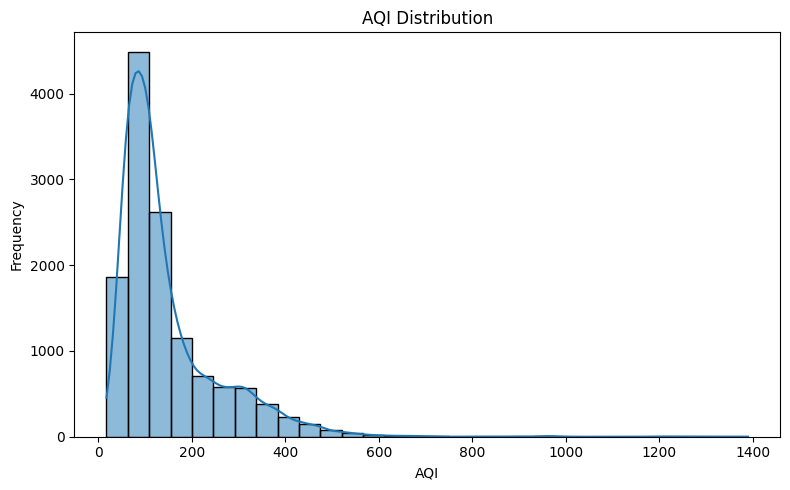

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df_model['AQI'], bins=30, kde=True)
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("aqi_distribution.png")
plt.show()


# AQI category function

In [8]:
def get_aqi_category(aqi):
    if aqi <= 50:
        return "🟢 Good"
    elif aqi <= 100:
        return "🟡 Satisfactory"
    elif aqi <= 200:
        return "🟠 Moderate"
    elif aqi <= 300:
        return "🔴 Poor"
    elif aqi <= 400:
        return "🟤 Very Poor"
    else:
        return "⚫ Severe"


# Gradio prediction function

In [9]:
def predict_aqi(pm25, pm10, no2, co, so2, o3):
    input_data = np.array([[pm25, pm10, no2, co, so2, o3]])
    prediction = model.predict(input_data)[0]
    category = get_aqi_category(prediction)

    # 🎨 Color-coded category
    if category == "Good":
        styled_category = "<span style='color:green; font-weight:bold;'>✅ Good</span>"
    elif category == "Satisfactory":
        styled_category = "<span style='color:#8BC34A; font-weight:bold;'>🙂 Satisfactory</span>"
    elif category == "Moderate":
        styled_category = "<span style='color:orange; font-weight:bold;'>⚠️ Moderate</span>"
    elif category == "Poor":
        styled_category = "<span style='color:red; font-weight:bold;'>🚫 Poor</span>"
    elif category == "Very Poor":
        styled_category = "<span style='color:darkred; font-weight:bold;'>❌ Very Poor</span>"
    elif category == "Severe":
        styled_category = "<span style='color:black; background-color:#ffcccc; font-weight:bold;'>☠️ Severe</span>"
    else:
        styled_category = f"<span>{category}</span>"

    result = f"<h3>🌫️ Predicted AQI: <b>{round(prediction, 2)}</b></h3><h4>🧭 AQI Category: {styled_category}</h4>"
    return result


 # Define inputs for Gradio

In [10]:
inputs = [
    gr.Number(label="PM2.5"),
    gr.Number(label="PM10"),
    gr.Number(label="NO2"),
    gr.Number(label="CO"),
    gr.Number(label="SO2"),
    gr.Number(label="O3"),
]


# Launch Gradio Interface

In [11]:
gr.Interface(
    fn=predict_aqi,
    inputs=inputs,
    outputs=gr.HTML(),  # ✅ correct syntax
    title="🌍 AQI Predictor from City-Day Dataset",
    description="Enter air pollutant readings to predict <b>Air Quality Index (AQI)</b> and see its health category."
).launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c59ce543516d9558e7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
